In [1]:
import cv2 as cv

import numpy as np 

import pandas as pd 

import plotly.express as px 

import matplotlib.pyplot as plt

import os 

import skimage

import seaborn as sns

from sklearn.cluster import KMeans

from tqdm import tqdm 

from matplotlib import cm



%matplotlib inline

In [2]:
## Load Segmented and Non-segmented images and labels into list for easy indexing 

images_list = []
labels_list = []

for i in ['Early', 'Pro', 'Benign', 'Pre']:
    
    print(f'Original/{i}', len(os.listdir(f'Original/{i}')))
    
    shapes_list = [] 
    
    dtypes_list = [] 
    
    for j in os.listdir(f'Original/{i}'):
        
#         im = cv2.imread(f'Original/{i}/{j}')
        
#         im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # Change color to RGB (from BGR) 
        
#         images_list.append(im)
        
#         shapes_list.append(im.shape)
        
        images_list.append(f'Original/{i}/{j}')
        
        labels_list.append(i)
        

seg_images_list = []
seg_labels_list = []

for i in os.listdir('Segmented'):
    
    print(i, len(os.listdir(f'Segmented/{i}')))
    
    for j in os.listdir(f'Segmented/{i}'):
        
        seg_images_list.append(f'Segmented/{i}/{j}')
        
        seg_labels_list.append(i)
        

Original/Early 985
Original/Pro 804
Original/Benign 504
Original/Pre 963
Early 985
Pro 804
Benign 504
Pre 963


## Circle Identification:

In [3]:
from time import time

from matplotlib.patches import Circle

In [27]:
def ID_circles(image, label, verbose = False):
    
    """Impliment Open CV hough circle transform on images"""

    src = cv.imread(image)

    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
        
    gray = cv.medianBlur(gray, 5)
    
    rows = gray.shape[0]
    
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT_ALT, 1.5, rows /28,
                               param1=300, param2=0.125,
                               minRadius=8, maxRadius=20) #HOUGH_GRADIENT param 2 ~= 15
    
    if circles is not None:
        
        circles = np.uint16(np.around(circles))
        
        rads = []
        cx = []
        cy = []
        
        for i in circles[0, :]:
            center = (i[0], i[1])
            cx.append(i[0])
            cy.append(i[1])
            radius = i[2]
            rads.append(radius)
            

    
        if verbose:
            
            fig, ax = plt.subplots(nrows= 1, ncols = 2)
            
            for i in circles[0, :]:
                center = (i[0], i[1])
                radius = i[2]
                CRC = Circle(center, radius=radius, fill = False, color = 'b') #, (255, 0, 255), 3)
                ax[0].add_patch(CRC)
    
            ax[0].imshow(src)
            ax[1].imshow(gray)
            
            fig.suptitle(label)

        return circles.shape[1], np.array(rads), np.array(cx), np.array(cy)
    
    if circles is None:
        
        print('circles not found!!')
        
        fig, ax = plt.subplots(nrows= 1, ncols = 2)
    
        ax[0].imshow(src)
        ax[1].imshow(gray)
        
        fig.suptitle(label)
    
        return 0,0,0,0

# Test functionality of Circle Detection Function

index:  1463
Label:  Pro
circles not found!!
Pro circles found pre segmentation:  29 Average Diameter:  12.413793103448276
No circles found in Post segmentation image
index:  2632
Label:  Pre
Pre circles found pre segmentation:  34 Average Diameter:  13.382352941176471
Pre circles found post segmentation:  15 Average Diameter:  13.0
index:  2142
Label:  Benign
Benign circles found pre segmentation:  29 Average Diameter:  12.96551724137931
Benign circles found post segmentation:  5 Average Diameter:  13.6
index:  2919
Label:  Pre
Pre circles found pre segmentation:  27 Average Diameter:  13.851851851851851
Pre circles found post segmentation:  13 Average Diameter:  12.307692307692308
index:  2413
Label:  Pre
Pre circles found pre segmentation:  35 Average Diameter:  13.228571428571428
Pre circles found post segmentation:  16 Average Diameter:  12.75
index:  1278
Label:  Pro
circles not found!!
Pro circles found pre segmentation:  30 Average Diameter:  13.2
No circles found in Post segme

/var/folders/94/bxh7fj4x7yl9kbsd9mrp4n740000gn/T/ipykernel_6026/643291389.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows= 1, ncols = 2)


Benign circles found pre segmentation:  26 Average Diameter:  13.307692307692308
Benign circles found post segmentation:  3 Average Diameter:  11.666666666666666
index:  409
Label:  Early
Early circles found pre segmentation:  19 Average Diameter:  12.947368421052632
Early circles found post segmentation:  10 Average Diameter:  12.6
index:  1937
Label:  Benign
Benign circles found pre segmentation:  14 Average Diameter:  13.214285714285714
Benign circles found post segmentation:  7 Average Diameter:  10.428571428571429
index:  2662
Label:  Pre
Pre circles found pre segmentation:  41 Average Diameter:  13.097560975609756
Pre circles found post segmentation:  7 Average Diameter:  12.571428571428571
index:  686
Label:  Early
Early circles found pre segmentation:  31 Average Diameter:  12.64516129032258
Early circles found post segmentation:  3 Average Diameter:  12.0
index:  2136
Label:  Benign
Benign circles found pre segmentation:  25 Average Diameter:  13.28
Benign circles found post s

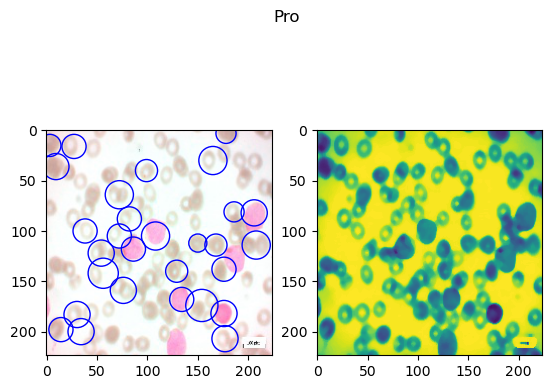

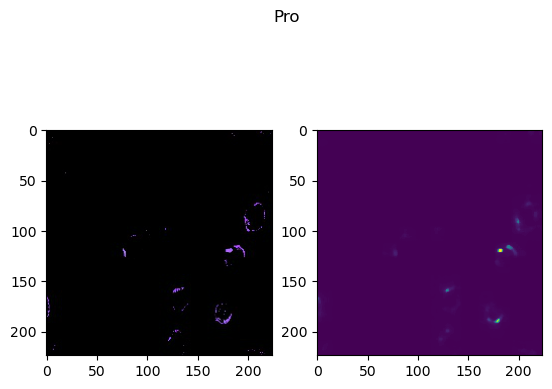

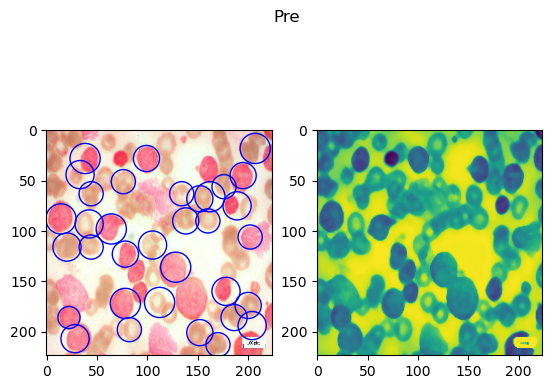

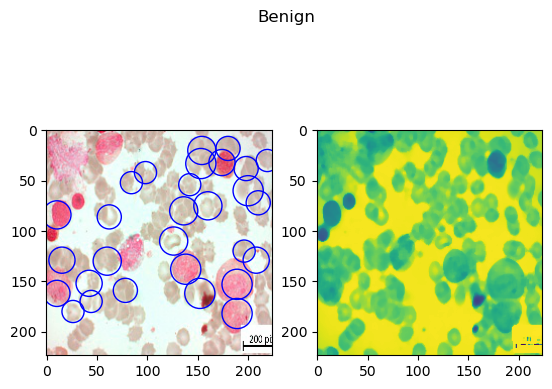

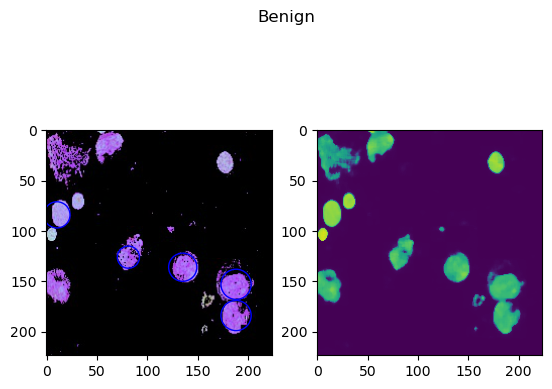

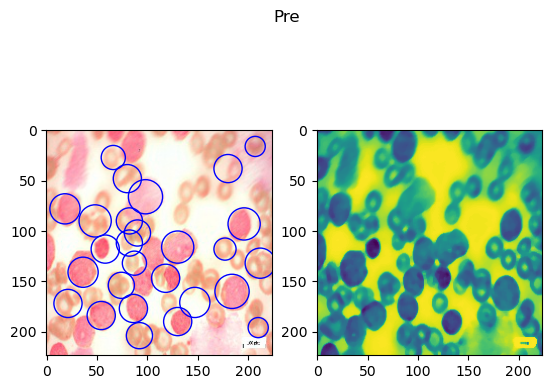

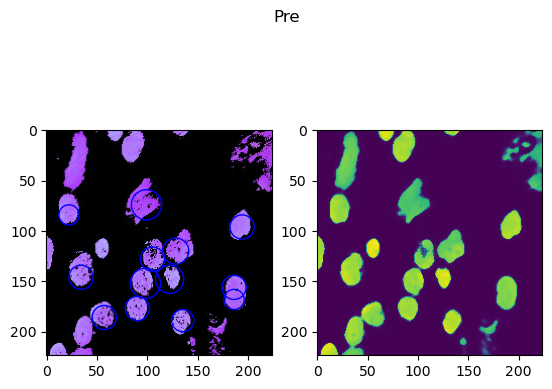

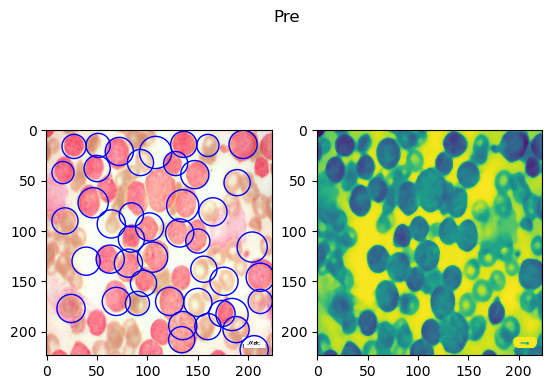

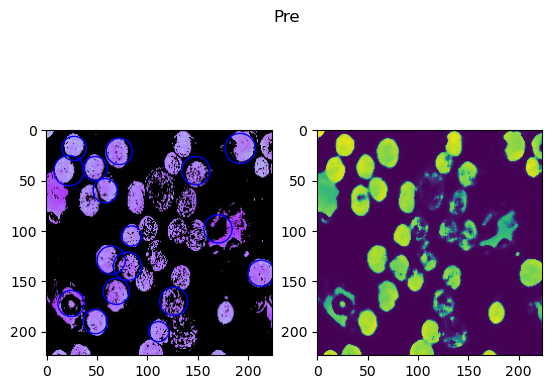

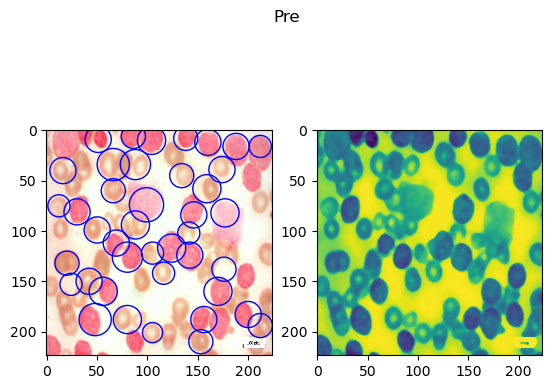

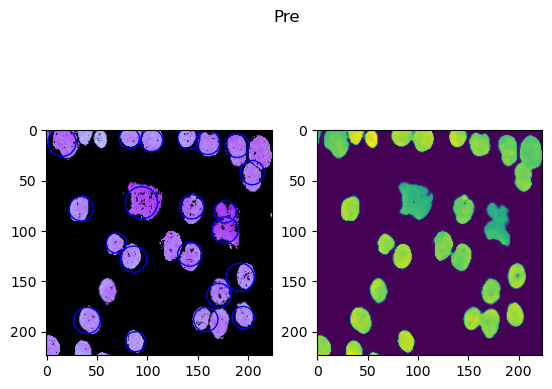

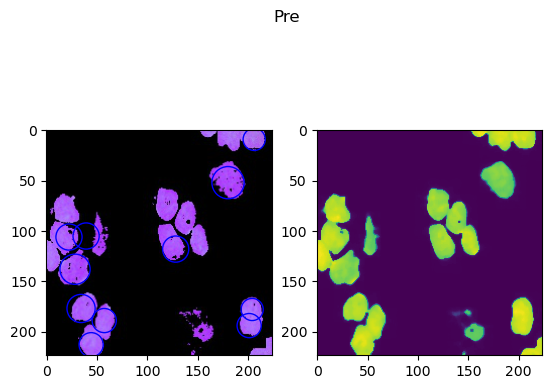

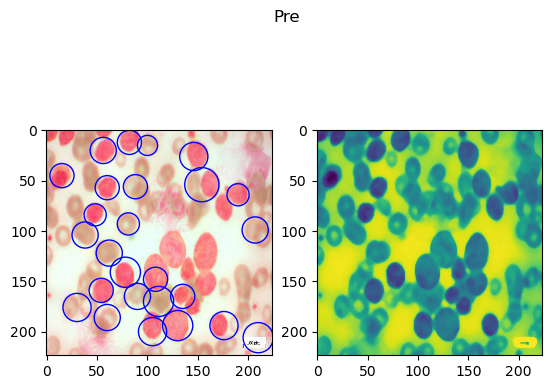

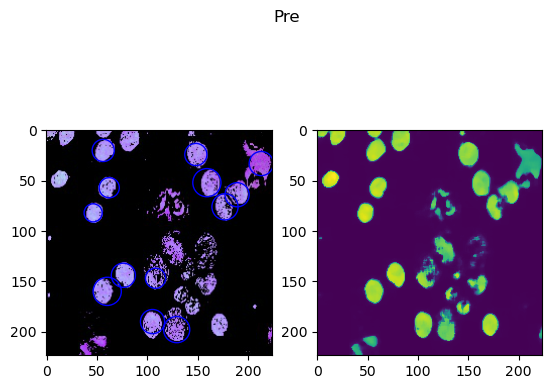

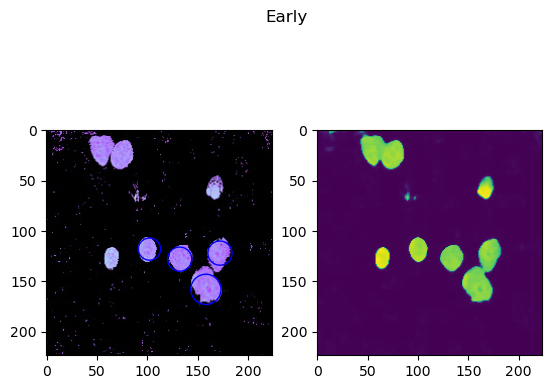

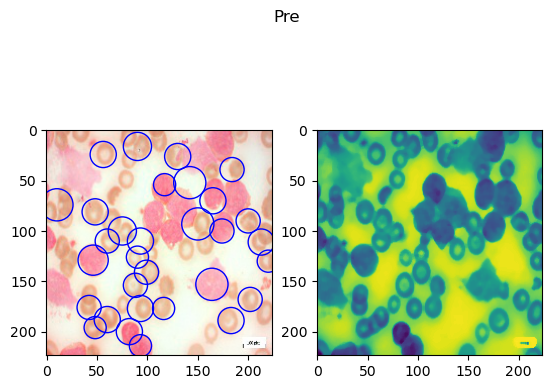

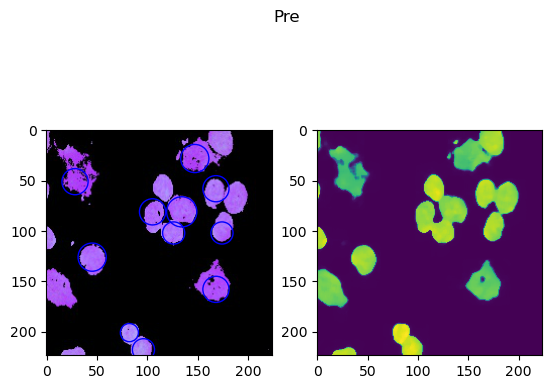

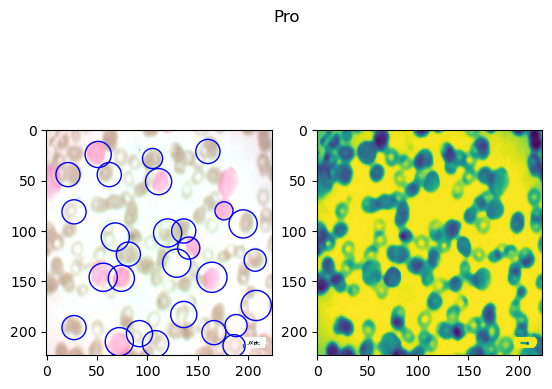

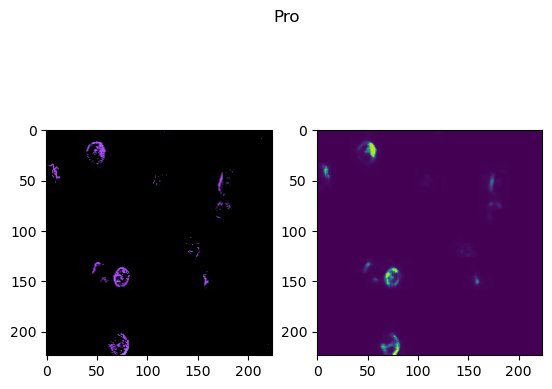

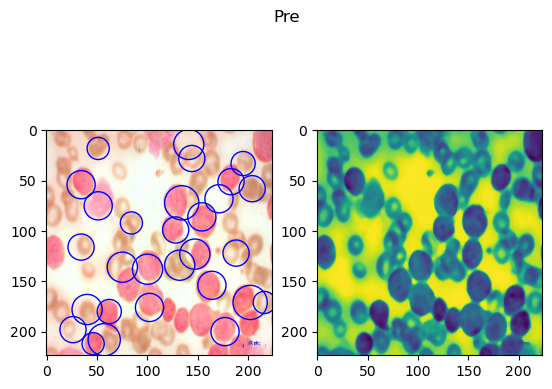

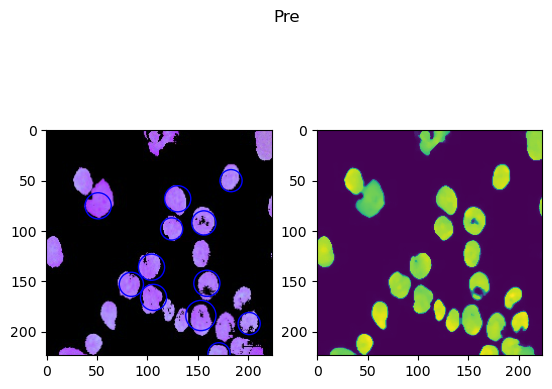

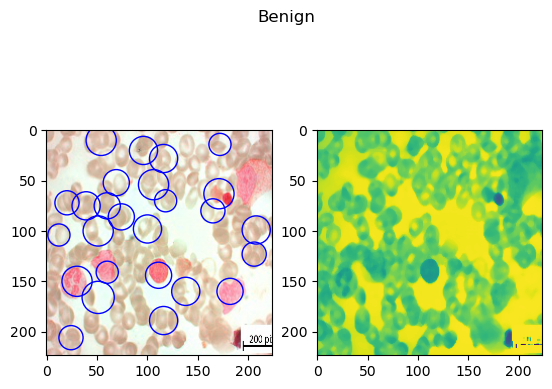

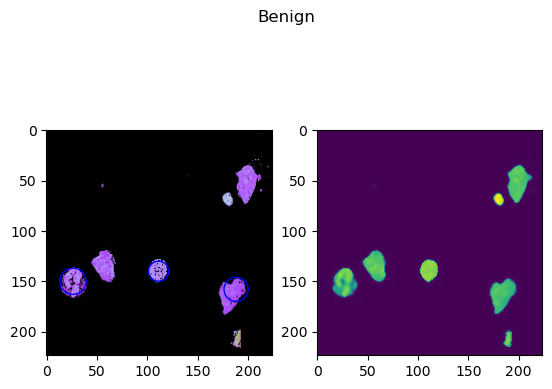

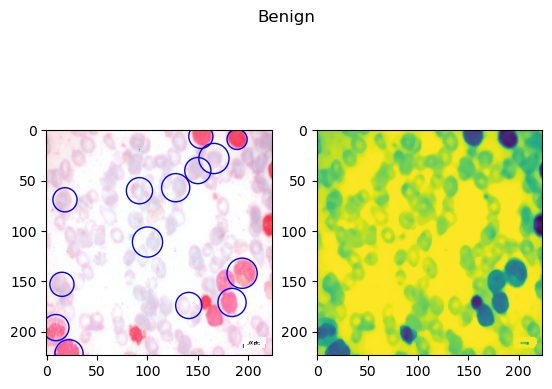

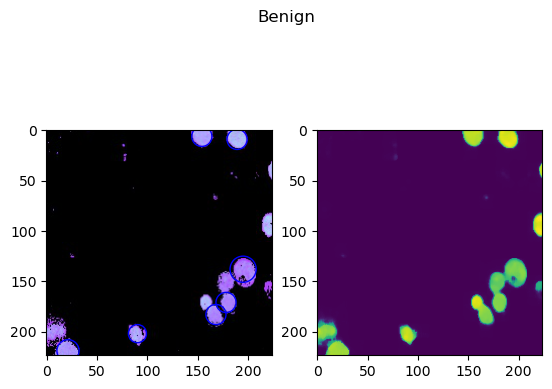

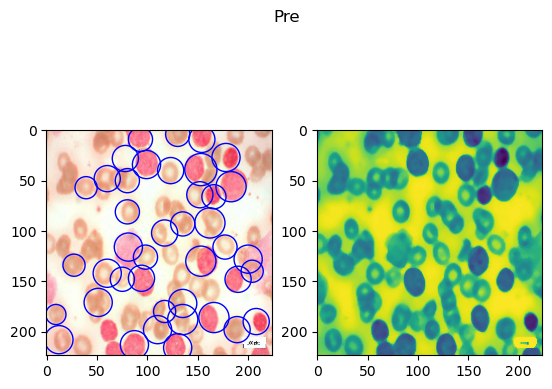

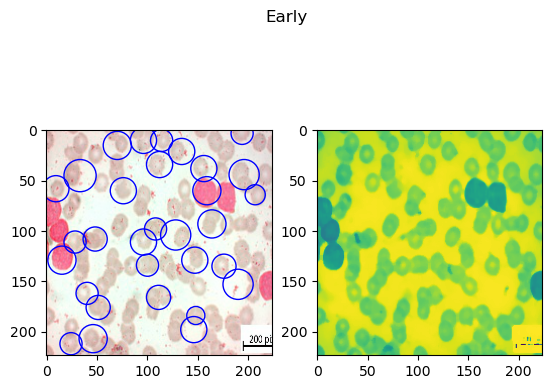

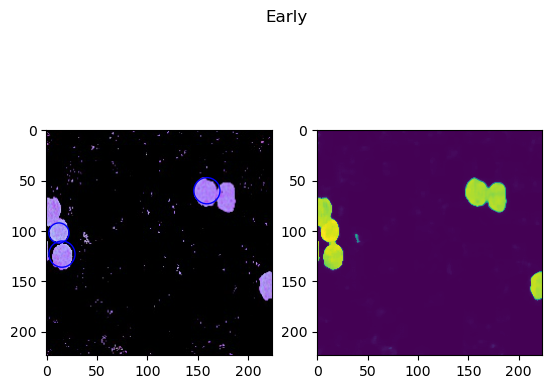

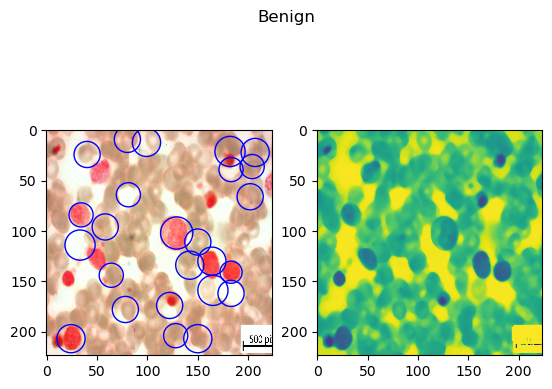

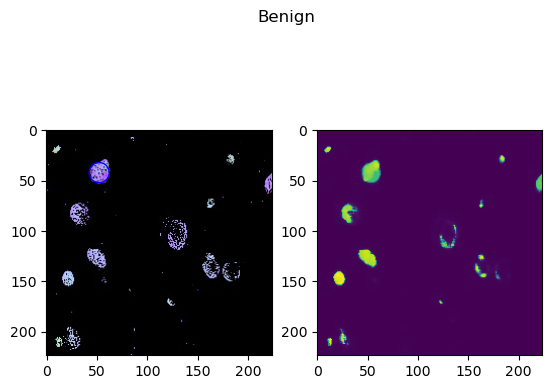

In [28]:
for i in range(20):    
    idx = int(np.random.rand(1)[0]*len(images_list))
    print('index: ', idx)
    print('Label: ', labels_list[idx])
    #idx = 504 ## override random draw

    c1 = ID_circles(images_list[idx], labels_list[idx], verbose = True)

    c2 = ID_circles(seg_images_list[idx], seg_labels_list[idx], verbose = True)

    if not isinstance(c1[1], int):

        print(labels_list[idx], 'circles found pre segmentation: ',  c1[0], 'Average Diameter: ', c1[1].mean()) 

    else:

        print('No circles found in Pre segmentation image')

    if not isinstance(c2[1], int):

        print(labels_list[idx], 'circles found post segmentation: ',  c2[0], 'Average Diameter: ', c2[1].mean()) 

    else:

        print('No circles found in Post segmentation image')

### Distributions for Circle Detection non-segmented images 

In [18]:
circle_met_ns = []

for image, label in zip(images_list, labels_list):
    
    c1 = ID_circles(image, label)
    
    if not isinstance(c1[1], int):
        
        ls_ = [label, c1[0], c1[1].mean(), c1[2].std(), c1[3].std()]
    
    else:
        
        ls_ = [label, c1[0], c1[1], c1[2], c1[3]]
        
        
    circle_met_ns.append(ls_)

df_circle_met_ns = pd.DataFrame(circle_met_ns, columns = ['Label','Circles','Avg Radius', 'Std X', 'Std Y'])

df_circle_met_ns['Std'] = (df_circle_met_ns['Std X'] + df_circle_met_ns['Std Y'])/2
df_circle_met_ns['Avg Area'] = (np.pi*df_circle_met_ns['Avg Radius']**2)
# sns.histplot(df_circle_met_ns[['Label','Circles']], x='Circles', hue='Label',
#              multiple='dodge', shrink=5, bins=100)


<AxesSubplot:xlabel='Std', ylabel='Count'>

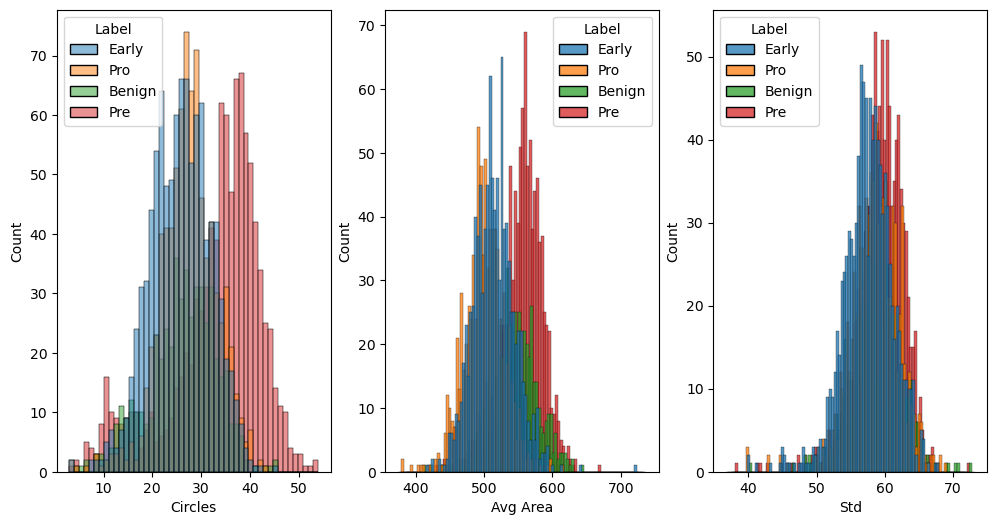

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(12, 6))  # step, stack, dodge 

sns.histplot(ax = ax[0], data = df_circle_met_ns, x='Circles', hue='Label',
              shrink=1, bins=50, multiple = 'layer')

sns.histplot(ax = ax[1], data = df_circle_met_ns, x='Avg Area', hue='Label',
             multiple='dodge', shrink=5, bins=100)

sns.histplot(ax = ax[2], data = df_circle_met_ns, x='Std', hue='Label',
             multiple='dodge', shrink=5, bins=100)

### Distributions for Circle Detection segmented images 

In [20]:
circle_met_s = []

for image, label in zip(images_list, labels_list):
    
    c1 = ID_circles(image, label)
    
    if not isinstance(c1[1], int):
        
        ls_ = [label, c1[0], c1[1].mean(), c1[2].std(), c1[3].std()]
    
    else:
        
        ls_ = [label, c1[0], c1[1], c1[2], c1[3]]
        
        
    circle_met_s.append(ls_)

df_circle_met_s = pd.DataFrame(circle_met_s, columns = ['Label','Circles','Avg Radius', 'Std X', 'Std Y'])

df_circle_met_s['Std'] = (df_circle_met_s['Std X'] + df_circle_met_s['Std Y'])/2
df_circle_met_s['Avg Area'] = (np.pi*df_circle_met_s['Avg Radius']**2)

<AxesSubplot:xlabel='Std', ylabel='Count'>

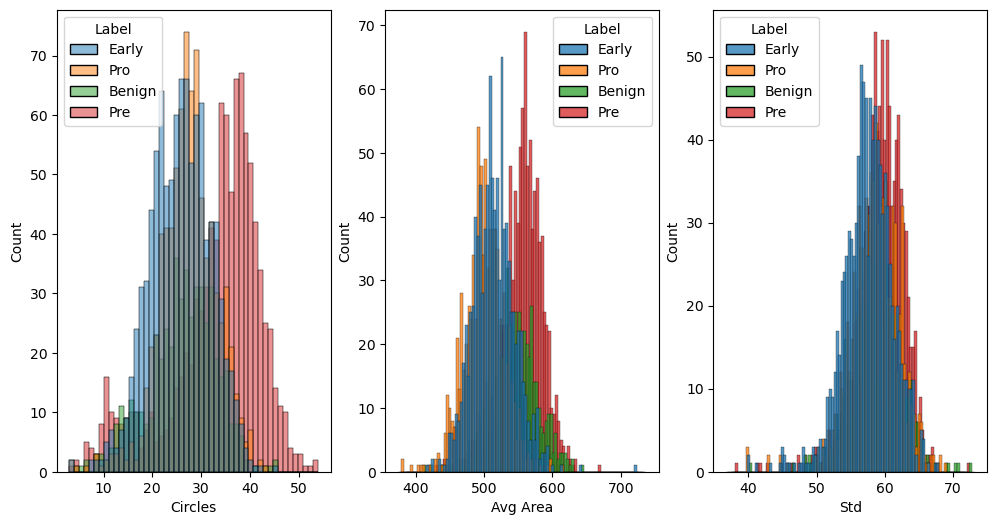

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(12, 6))  # step, stack, dodge 

sns.histplot(ax = ax[0], data = df_circle_met_s, x='Circles', hue='Label',
              shrink=1, bins=50, multiple = 'layer')

sns.histplot(ax = ax[1], data = df_circle_met_s, x='Avg Area', hue='Label',
             multiple='dodge', shrink=5, bins=100)

sns.histplot(ax = ax[2], data = df_circle_met_s, x='Std', hue='Label',
             multiple='dodge', shrink=5, bins=100)


## YCrCB Counts & averages

In [44]:
def YCrCB_met(image, label, verbose = False):
    
    src = cv.imread(image)
    
    imgYCC = cv.cvtColor(src, cv.COLOR_BGR2YCR_CB)

    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
        
    gray = cv.medianBlur(gray, 5)
    
    if verbose: 
        
        a = ( src > 0).sum() 
        b = (gray > 0).sum() 
        c = ( imgYCC > 0).sum() 
    
        print(a, b, c)
        
        fig, ax = plt.subplots(nrows = 1, ncols = 3)
        
        ax[0].imshow(src)
        ax[1].imshow(gray, cmap = 'gray')
        ax[2].imshow(imgYCC)

index:  1288
Label:  Pro
150528 50176 150528
18854 10128 110313
index:  530
Label:  Early
150399 50176 150498
54194 30190 127764


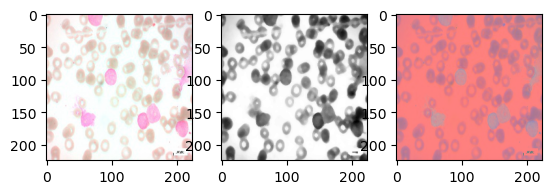

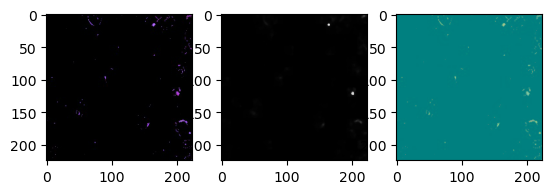

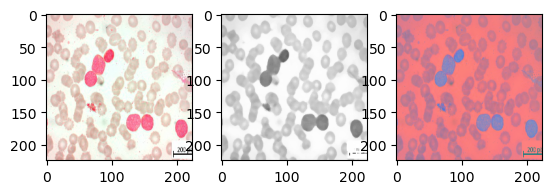

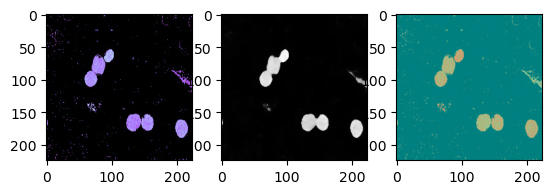

In [45]:
for i in range(2):  
    
    idx = int(np.random.rand(1)[0]*len(images_list))
    print('index: ', idx)
    print('Label: ', labels_list[idx])
    #idx = 504 ## override random draw

    YCrCB_met(images_list[idx], labels_list[idx], verbose = True)

    YCrCB_met(seg_images_list[idx], seg_labels_list[idx], verbose = True)

## Linear Binary Pattern: Detecting Local Texture 

In [10]:
import skimage.feature as feature

In [11]:
def LBP(img, label, verbose = False):

    class LocalBinaryPatterns:
        
        def __init__(self, numPoints, radius):
            self.numPoints = numPoints
            self.radius = radius

        def describe(self, image, eps = 1e-7):
            lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
            (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints+3), range=(0, self.numPoints + 2))

            # Normalize the histogram
            hist = hist.astype('float')
            hist /= (hist.sum() + eps)

            return hist, lbp
    

    image = cv.imread(img)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    desc = LocalBinaryPatterns(24, 8)
    hist, lbp = desc.describe(gray)
    print("Histogram of Local Binary Pattern value: {}".format(hist))
    
#     contrast = contrast.flatten()
#     dissimilarity = dissimilarity.flatten()
#     homogeneity = homogeneity.flatten()
#     energy = energy.flatten()
#     correlation = correlation.flatten()
#     ASM = ASM.flatten()
#     hist = hist.flatten()
    
    if verbose:
            
        fig, ax = plt.subplots(nrows= 2, ncols = 2, figsize = (16,8))

        ax[0,0].imshow(image, cmap = 'gray')
        ax[0,1].imshow(gray, cmap = 'gray')
        ax[1,0].imshow(lbp, cmap = 'gray')
        ax[1,1].hist(hist)

        fig.suptitle(label)
        #fig.show()
        
        print(type(desc), type(hist))
        print(desc)

#     features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation, ASM, hist), axis=0) 


index:  1029
Label:  Pro
Histogram of Local Binary Pattern value: [0.016761   0.02012915 0.00773278 0.00669643 0.00661671 0.00747369
 0.00819117 0.00958626 0.01337293 0.01805644 0.01935188 0.0198302
 0.01911272 0.02369659 0.02264031 0.02891821 0.02674585 0.02214206
 0.01231665 0.00775271 0.00693559 0.00978555 0.0154257  0.02953603
 0.04049745 0.58069595]
<class '__main__.LBP.<locals>.LocalBinaryPatterns'> <class 'numpy.ndarray'>
<__main__.LBP.<locals>.LocalBinaryPatterns object at 0x150e3e6d0>


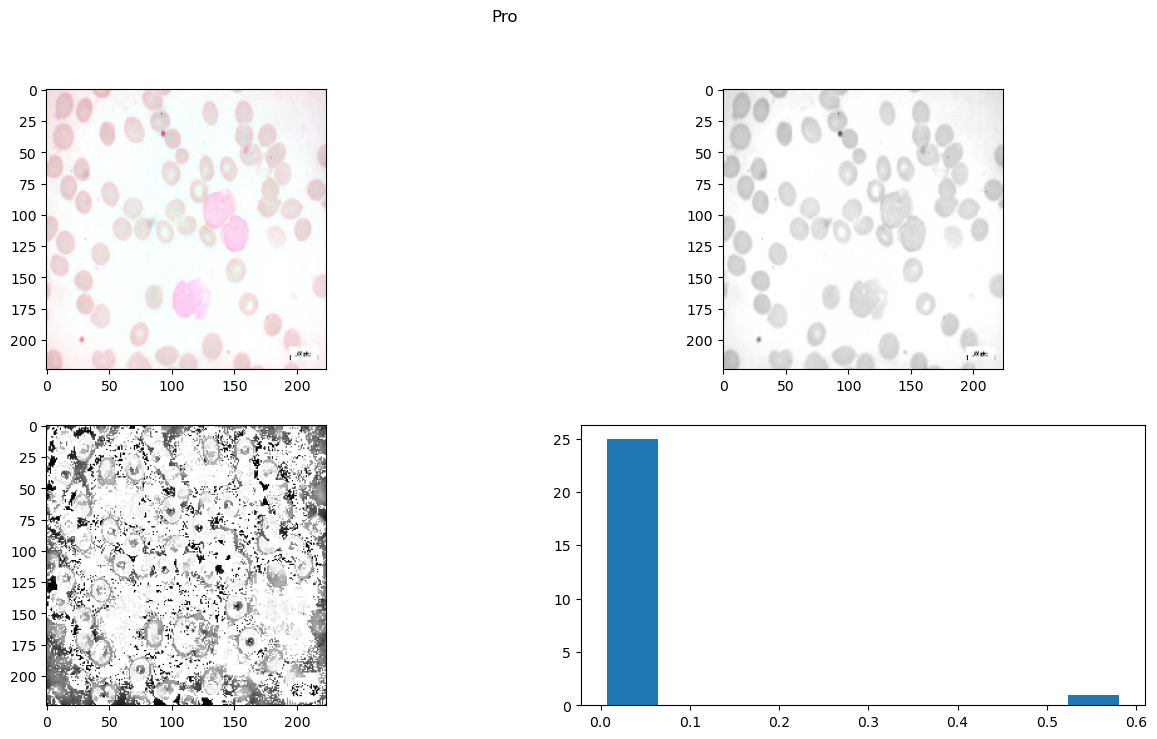

In [12]:
idx = int(np.random.rand(1)[0]*len(images_list))
print('index: ', idx)
print('Label: ', labels_list[idx])
#idx = 504 ## override random draw

LBP(images_list[idx], labels_list[idx], verbose = True)

index:  207
Label:  Early
Histogram of Local Binary Pattern value: [3.62523916e-02 2.53109056e-02 1.14397321e-02 5.42091837e-03
 3.70695153e-03 2.86989796e-03 2.43144133e-03 2.55102041e-03
 2.39158163e-03 3.50765306e-03 3.14891582e-03 2.41151148e-03
 1.65417730e-03 1.51466837e-03 9.16772959e-04 1.29544005e-03
 8.76913265e-04 9.16772959e-04 6.97544643e-04 5.77965561e-04
 4.58386480e-04 5.97895408e-04 4.78316327e-04 1.99298469e-03
 5.87591677e-01 2.98987564e-01]
<class '__main__.LBP.<locals>.LocalBinaryPatterns'> <class 'numpy.ndarray'>
<__main__.LBP.<locals>.LocalBinaryPatterns object at 0x152760d00>


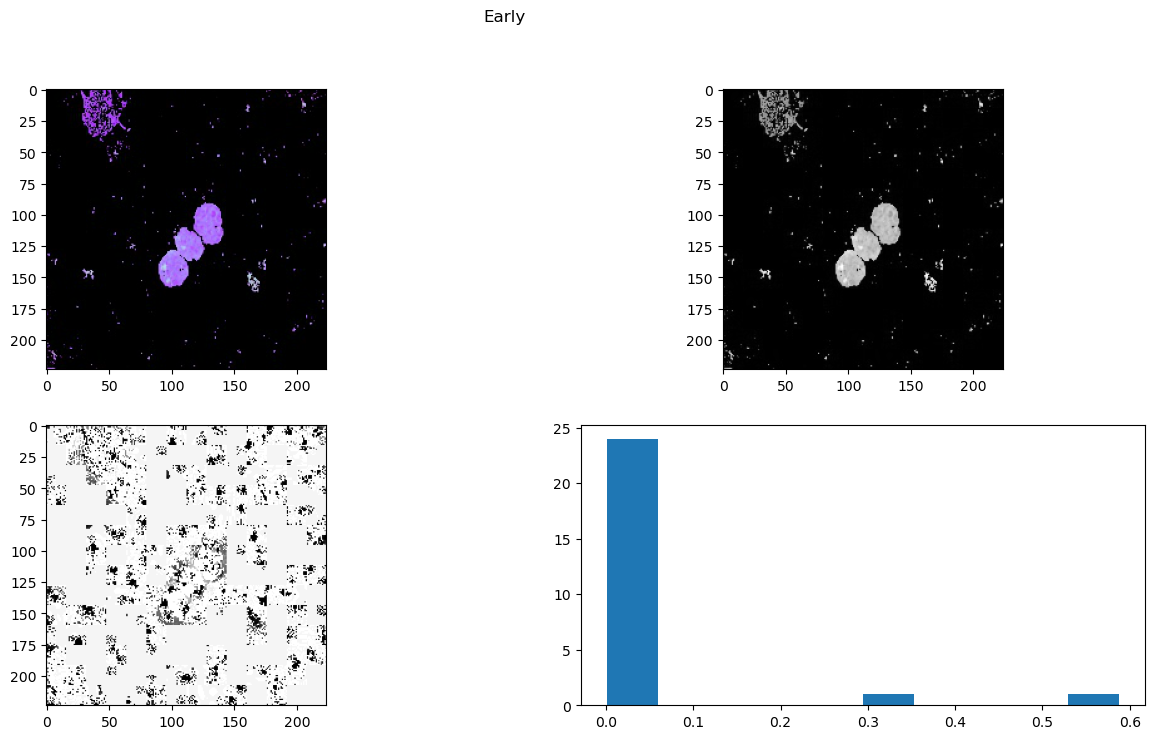

In [13]:
idx = int(np.random.rand(1)[0]*len(images_list))
print('index: ', idx)
print('Label: ', seg_labels_list[idx])
#idx = 504 ## override random draw

LBP(seg_images_list[idx], seg_labels_list[idx], verbose = True)

## HOG Contours 

In [14]:
from skimage.feature import hog
from skimage import data, exposure

In [15]:
def HOG(image, label, thresh, verbose = False):
    
    """Return HOG, _, HOG Rescaled"""
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Change color to RGB (from BGR) 
    
    img = skimage.color.rgb2gray(image) # convert image to grayscale 
    
    fd, hog_image = hog(img, orientations = 8, pixels_per_cell = (2,2), 
                       cells_per_block = (1,1), visualize = True
                        ) #multichannel = False ("Channle_axis?")

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,25))

    binary_base = hog_image.copy()
    binary_base_rs = hog_image_rescaled.copy()

    binary = binary_base[binary_base > thresh]
    
    binary_2 = binary_base_rs[binary_base_rs > thresh] 
    
    pct = binary.shape[0]/(binary_base.shape[0]*binary_base.shape[1]) * 100 
    
    if verbose: 
        
        print(type(hog_image), type(hog_image_rescaled))
        print('min, max:', binary_base.min(), binary_base.max())
        print('rescaled min, max:', binary_base_rs.min(), binary_base_rs.max())
        print(type(binary_base), binary_base.shape)
        print(type(binary), binary.shape, binary.shape[0])
        print(type(binary_2), binary_2.shape)
        print('pct gradient above 0.25: ', pct, '%')
        
        fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (24,16))
    
        ax[0,0].imshow(image)
        ax[0,0].set_title(f'RGB Image: {label}')

        ax[0,1].imshow(img, cmap = 'gray')
        ax[0,1].set_title(f'Grayscale: {label}')

        ax[0,2].imshow(hog_image_rescaled, cmap = 'gray')
        ax[0,2].set_title('HOG')

        ax[1,0].hist(hog_image.flatten())
        ax[1,0].set_title('HOG Hist')

        ax[1,1].hist(binary.flatten())
        ax[1,1].set_title('Binary HOG Hist (>0)')

        ax[1,2].hist(binary_2.flatten())
        ax[1,2].set_title('Binary HOG Hist (>0.05)')

        fig.suptitle(labels_list[idx])

        fig.suptitle(f'Stage: {label}')
    
    return hog_image, fd, hog_image_rescaled, pct